In [64]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [50]:
mypath = 'analysis'
f = []
for (dirpath, dirnames, filenames) in os.walk(mypath):
    break

In [57]:
number_of_configurations = len(dirnames)
number_instances_per_config = len(os.listdir(mypath + '/' + dirnames[0])) - 1

In [58]:
number_of_configurations, number_instances_per_config

(4, 5)

In [59]:
print("Folders")
for i, dirname in enumerate(dirnames):
    print(i, ' ', dirname)

Folders
0   22_11_29_19_58
1   22_11_29_19_55
2   22_11_29_19_54
3   22_11_29_19_56


In [81]:
config_num = 0
instance_num = 0

def text_to_float(text):
    return float(text.split('= ')[-1].split(' \n')[0])

def retrieve_instance_result(config_num, instance_num):
    """
    returns runtime and objective for a given configuration and instance number
    """
    path = mypath + '/' + dirnames[config_num]
    instance_filename = f'instance_{instance_num}.txt'

    if instance_filename in os.listdir(path):
        with open(path + '/' + instance_filename) as f:
            contents = f.readlines()
            
    rt = text_to_float(contents[-2])
    obj = text_to_float(contents[-1])
            
    return rt, obj

In [48]:
retrieve_instance_result(0, 1)

(0.013165950775146484, 1.0)

In [82]:
def get_metric_over_all_instances(config_num, metric):
    """
    Gets the runtime or obj for a given configuration number
    """
    number_of_configurations = len(dirnames)
    number_instances_per_config = len(os.listdir(mypath + '/' + dirnames[config_num])) - 1
    
    metric_vals = []
    
    for instance_num in range(number_instances_per_config):
        rt, obj = retrieve_instance_result(config_num, instance_num)
        
        if metric == 'runtime':
            metric_vals.append(rt)
            
        elif metric == 'obj':
            metric_vals.append(obj)
    
    return metric_vals

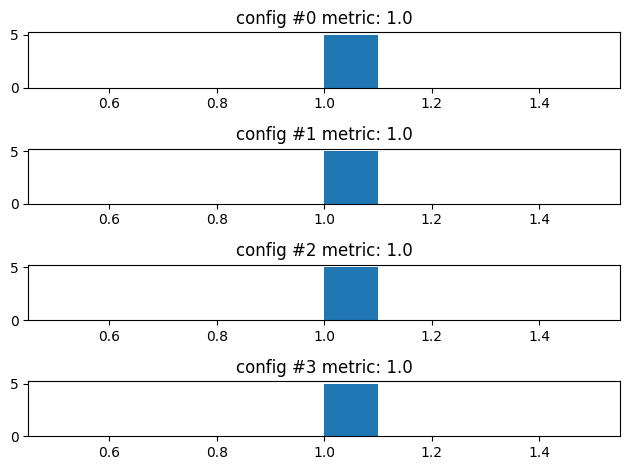

In [83]:
fig, ax = plt.subplots(number_of_configurations, 1)
metric = 'obj'

for config_num in range(number_of_configurations):
    metric_vals = get_metric_over_all_instances(config_num=0, metric=metric)
    ax[config_num].hist(metric_vals)
    ax[config_num].set_title(f'config #{config_num} metric: {obj}')
    
fig.tight_layout()